In [1]:
# Instala a versão exata do pacote matplotlib
!pip install -q -U matplotlib==3.2.1

In [2]:
import matplotlib as mat
mat.__version__

'3.2.1'

In [5]:
# Importando o módulo de acesso ao SQLite
import sqlite3
import random
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
# Cria uma conexão com o banco de dados.
# Se o banco de dados não existir, ele é criado neste momento.
conn = sqlite3.connect('dsa.db')

# Criando um cursor
c = conn.cursor()

# Função para criar uma tabela
def create_table():
    c.execute('CREATE TABLE IF NOT EXISTS produtos(' \
              'id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT,'\
              'prod_name TEXT, valor REAL)')
    
# Função para inserir uma linha
def data_insert():
    new_date = datetime.datetime.now()
    new_prod_name = 'monitor'
    new_valor = random.randrange(50,100)
    c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
              (new_date, new_prod_name, new_valor))
    conn.commit()
    
# Leitura de dados
def leitura_todos_dados():
    c.execute('SELECT * FROM produtos')
    for linha in c.fetchall():
        print(linha)
        
# Leitura de registros específicos
def leitura_registros():
    c.execute('SELECT * FROM produtos WHERE valor > 60.0')
    for linha in c.fetchall():
        print(linha)

# Leitura de colunas específicos
def leitura_colunas():
    c.execute('SELECT * FROM produtos')
    for linha in c.fetchall():
        print(linha[3])
        
# Update
def atualiza_dados():
    c.execute('UPDATE produtos SET valor = 70.00 WHERE valor = 74.0')
    conn.commit()
    
# Delete
def remove_dados():
    c.execute('DELETE FROM produtos WHERE valor = 68.0')
    conn.commit()
    
# Gerar gráfico com os dados do banco de dados
def dados_grafico():
    c.execute('SELECT id, valor FROM produtos')
    ids = []
    valores = []
    dados = c.fetchall()
    for linha in dados:
        ids.append(linha[0])
        valores.append(linha[1])
        
    plt.bar(ids, valores)
    plt.show()

<IPython.core.display.Javascript object>


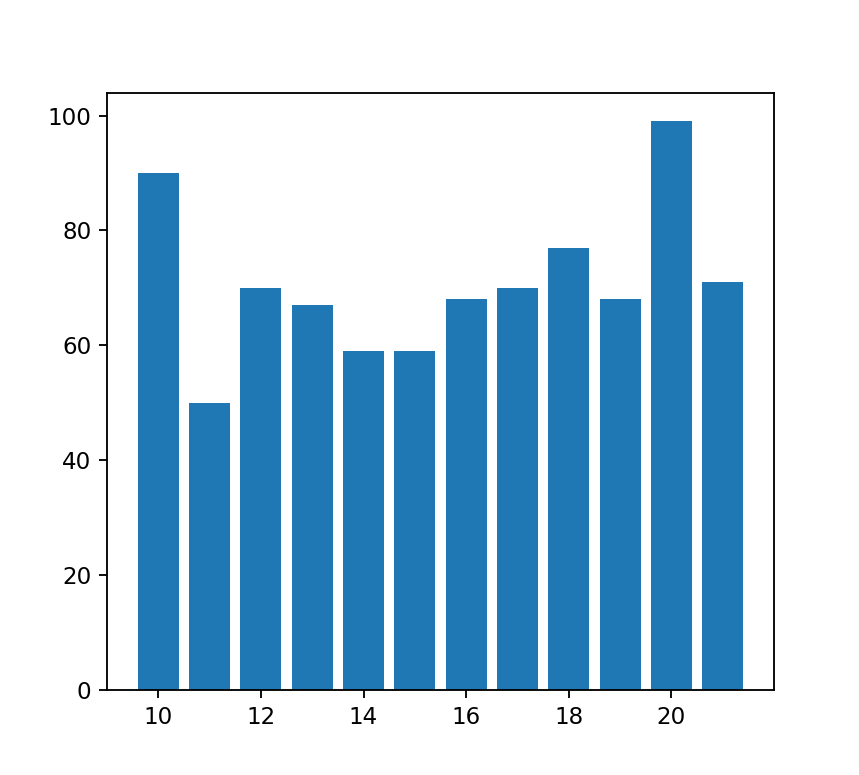

In [10]:
# Gerando gráficos
dados_grafico()